In [3]:
!pip install "numpy<2"


Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.2
    Uninstalling numpy-2.4.2:
      Successfully uninstalled numpy-2.4.2
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl.metadata (6.6 kB)
Using cached numpy-2.4.2-cp312-cp312-macosx_14_0_arm64.whl (5.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.4.2 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.2 which is incompatible.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.2 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

def load_image(path):
    img = mpimg.imread(path)
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    if img.ndim == 3 and img.shape[2] == 4:
        img = img[:, :, :3]
    return img

def to_gray(img):
    if img.ndim == 2:
        return img.astype(np.uint8)
    g = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    return g.astype(np.uint8)

def show2(a, ta, b, tb, cmap_b='gray'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(a)
    plt.title(ta)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(b, cmap=cmap_b)
    plt.title(tb)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_path = '/Users/210719/Downloads/Granger.jpg'
img = load_image(img_path)
gray1 = to_gray(img)
show2(img, 'Input (Color)', gray1, 'Output (Grayscale)')
#%%
def mirror_effect(image, mirror_from='right'):
    h, w = image.shape[:2]
    mid = w // 2
    out = image.copy()

    if mirror_from == 'right':
        right = image[:, mid:]
        out[:, :w - mid] = np.flip(right, axis=1)
    elif mirror_from == 'left':
        left = image[:, :mid]
        out[:, w - mid:] = np.flip(left, axis=1)
    else:
        raise ValueError("mirror_from must be 'right' or 'left'")

    return out

mirror_img = mirror_effect(img, 'right')
show2(img, 'Input Image', mirror_img, 'Mirror Output', cmap_b=None)
#%%
def bitget(image_gray, bit_position):
    if not (1 <= bit_position <= 8):
        raise ValueError('bit_position must be in [1, 8]')
    return (((image_gray >> (bit_position - 1)) & 1) * 255).astype(np.uint8)

def displayBitResponse(image):
    gray = to_gray(image)
    plt.figure(figsize=(12, 6))
    for b in range(1, 9):
        plt.subplot(2, 4, b)
        plt.imshow(bitget(gray, b), cmap='gray', vmin=0, vmax=255)
        plt.title(f'bit plane {b}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

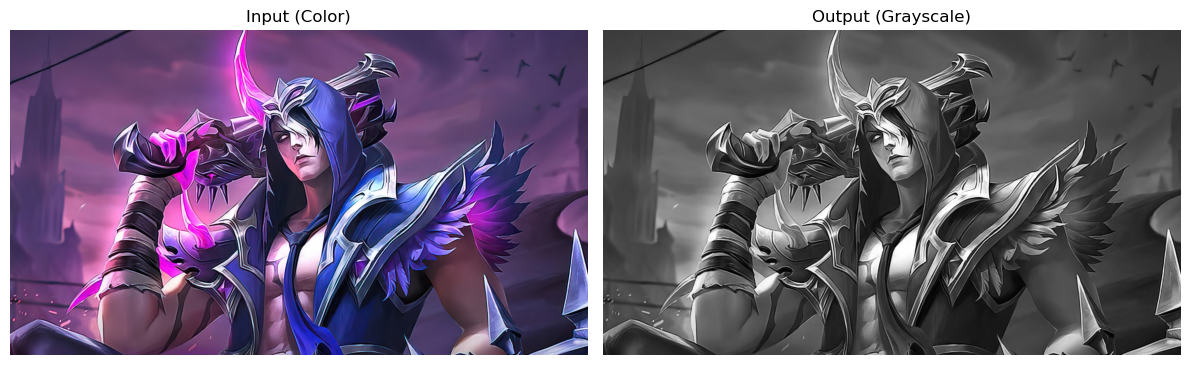

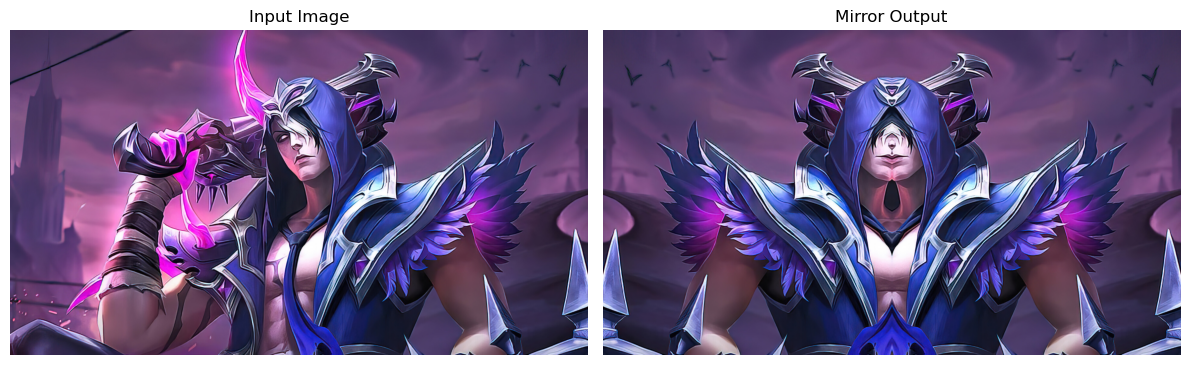

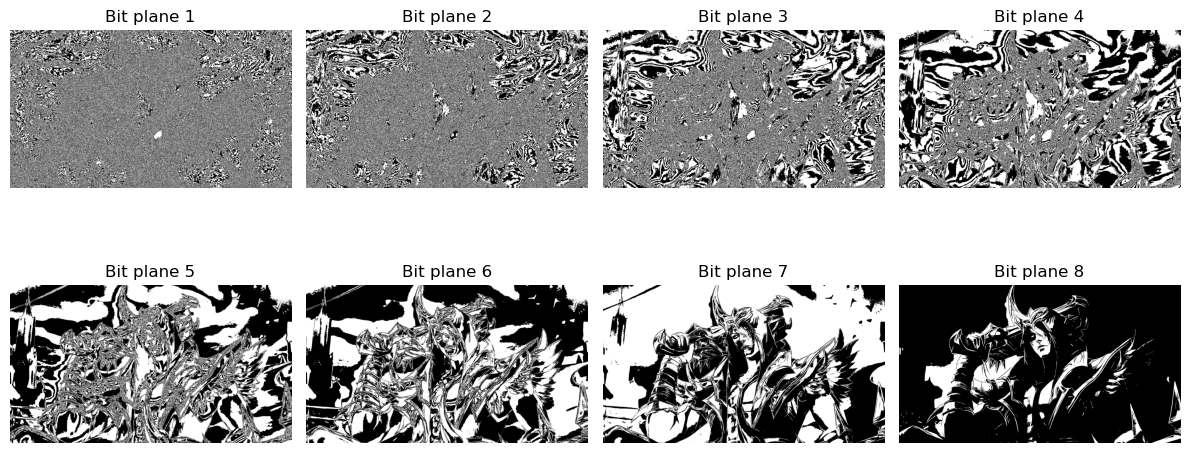

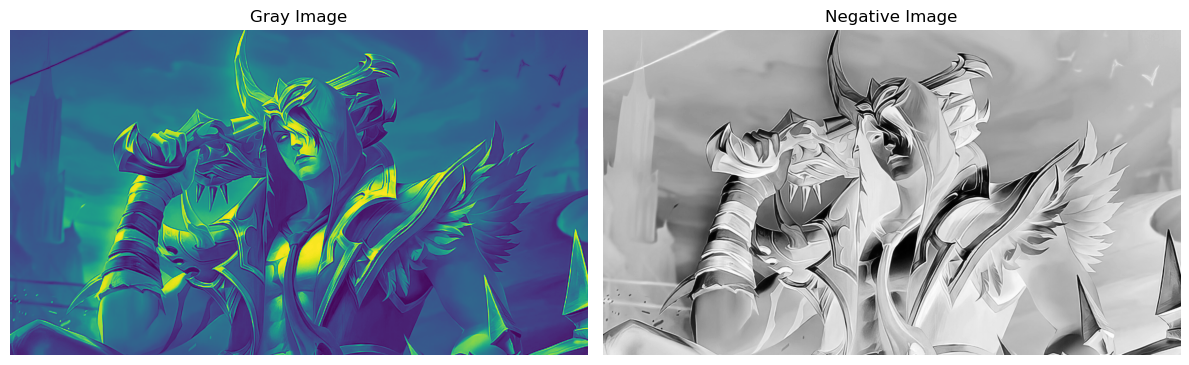

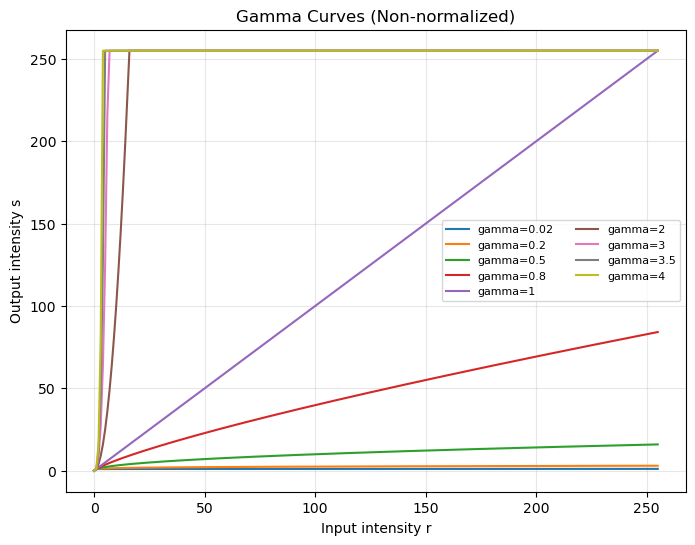

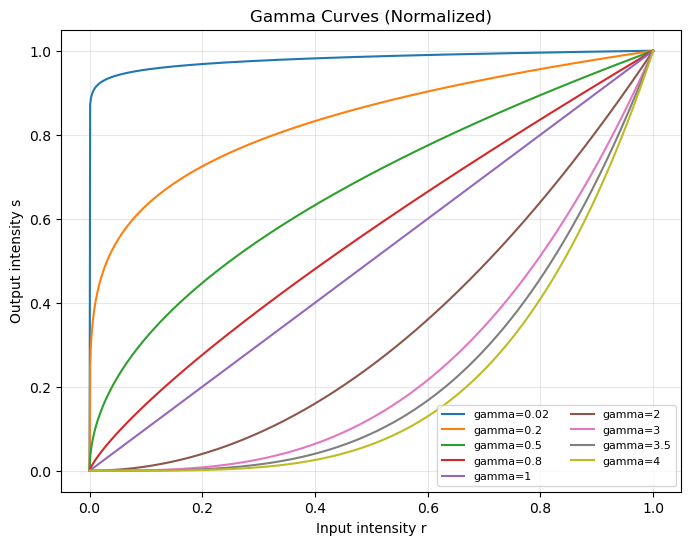

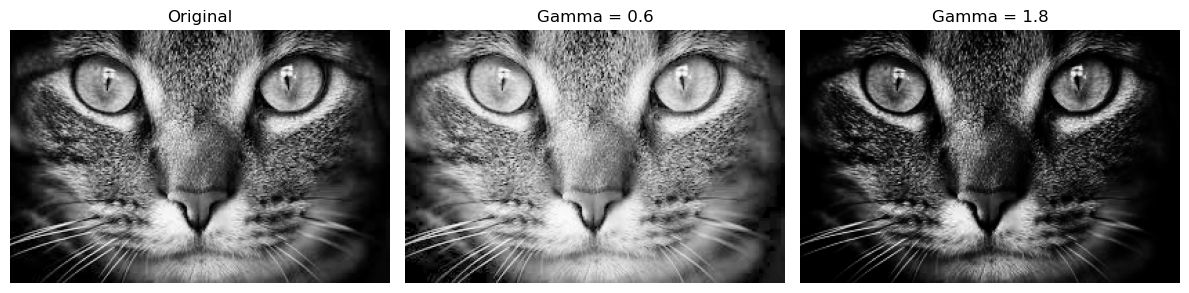

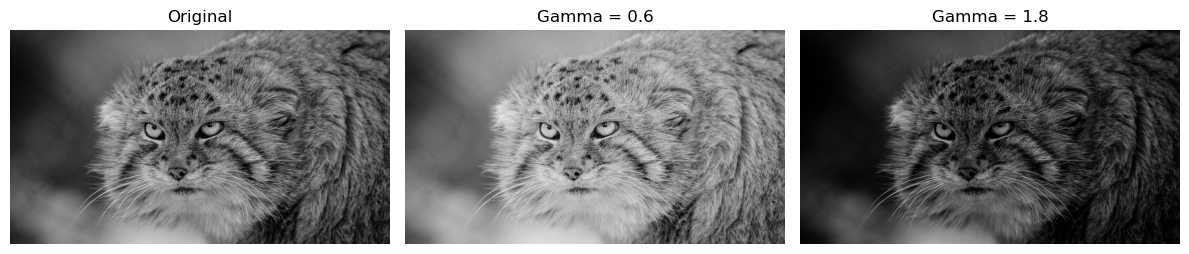

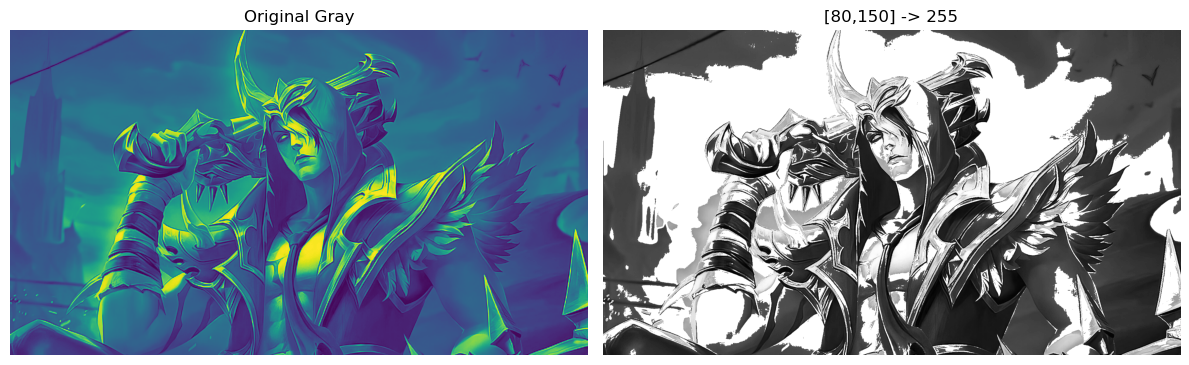

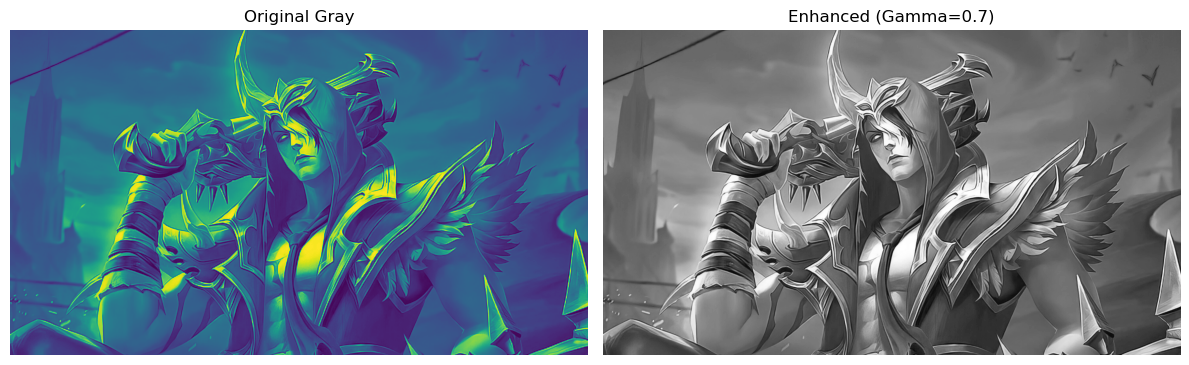

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

# -------------------------------------------------
# Load Image
# -------------------------------------------------
def load_image(path):
    img = mpimg.imread(path)
    if img.dtype != np.uint8:
        img = (img * 255).astype(np.uint8)
    if img.ndim == 3 and img.shape[2] == 4:
        img = img[:, :, :3]
    return img

# -------------------------------------------------
# Convert to Grayscale
# -------------------------------------------------
def to_gray(img):
    if img.ndim == 2:
        return img.astype(np.uint8)
    g = 0.299 * img[:, :, 0] + 0.587 * img[:, :, 1] + 0.114 * img[:, :, 2]
    return g.astype(np.uint8)

# -------------------------------------------------
# Show Two Images
# -------------------------------------------------
def show2(a, ta, b, tb, cmap_b='gray'):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(a)
    plt.title(ta)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if cmap_b:
        plt.imshow(b, cmap=cmap_b, vmin=0, vmax=255)
    else:
        plt.imshow(b)
    plt.title(tb)
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# -------------------------------------------------
# Load and Show Gray
# -------------------------------------------------
img_path = '/Users/210719/Downloads/Granger.jpg'
img = load_image(img_path)
gray = to_gray(img)

show2(img, 'Input (Color)', gray, 'Output (Grayscale)')

# -------------------------------------------------
# Mirror Effect
# -------------------------------------------------
def mirror_effect(image, mirror_from='right'):
    h, w = image.shape[:2]
    mid = w // 2
    out = image.copy()

    if mirror_from == 'right':
        right = image[:, mid:]
        out[:, :w - mid] = np.flip(right, axis=1)
    elif mirror_from == 'left':
        left = image[:, :mid]
        out[:, w - mid:] = np.flip(left, axis=1)
    else:
        raise ValueError("mirror_from must be 'right' or 'left'")

    return out

mirror_img = mirror_effect(img, 'right')
show2(img, 'Input Image', mirror_img, 'Mirror Output', cmap_b=None)

# -------------------------------------------------
# Bit Plane Slicing
# -------------------------------------------------
def bitget(image_gray, bit_position):
    if not (1 <= bit_position <= 8):
        raise ValueError('bit_position must be in [1, 8]')
    return (((image_gray >> (bit_position - 1)) & 1) * 255).astype(np.uint8)

def displayBitResponse(image):
    gray = to_gray(image)
    plt.figure(figsize=(12, 6))
    for b in range(1, 9):
        plt.subplot(2, 4, b)
        plt.imshow(bitget(gray, b), cmap='gray', vmin=0, vmax=255)
        plt.title(f'Bit plane {b}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

displayBitResponse(img)

# -------------------------------------------------
# Negative Image
# -------------------------------------------------
negative = 255 - gray
show2(gray, 'Gray Image', negative, 'Negative Image')

# -------------------------------------------------
# Gamma Curves
# -------------------------------------------------
gammas = [0.02, 0.2, 0.5, 0.8, 1, 2, 3, 3.5, 4]

# Non-normalized
x_non = np.arange(0, 256, dtype=np.float32)
plt.figure(figsize=(8, 6))
for g in gammas:
    y_non = np.clip(np.power(x_non, g), 0, 255)
    plt.plot(x_non, y_non, label=f'gamma={g}')
plt.title('Gamma Curves (Non-normalized)')
plt.xlabel('Input intensity r')
plt.ylabel('Output intensity s')
plt.legend(fontsize=8, ncol=2)
plt.grid(alpha=0.3)
plt.show()

# Normalized
x_norm = np.linspace(0, 1, 1001, dtype=np.float32)
plt.figure(figsize=(8, 6))
for g in gammas:
    y_norm = np.power(x_norm, g)
    plt.plot(x_norm, y_norm, label=f'gamma={g}')
plt.title('Gamma Curves (Normalized)')
plt.xlabel('Input intensity r')
plt.ylabel('Output intensity s')
plt.legend(fontsize=8, ncol=2)
plt.grid(alpha=0.3)
plt.show()

# -------------------------------------------------
# Gamma Correction Function
# -------------------------------------------------
def gamma_correction(gray, gamma):
    r = gray.astype(np.float32) / 255.0
    s = np.power(r, gamma)
    return np.clip(s * 255, 0, 255).astype(np.uint8)

# Apply to Two Images
paths = [
    '/Users/210719/Downloads/cat1.jpeg',
    '/Users/210719/Downloads/cat2.jpg'
]

for p in paths:
    im = load_image(p)
    g = to_gray(im)
    out1 = gamma_correction(g, 0.6)
    out2 = gamma_correction(g, 1.8)

    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 3, 1)
    plt.imshow(g, cmap='gray', vmin=0, vmax=255)
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.imshow(out1, cmap='gray', vmin=0, vmax=255)
    plt.title('Gamma = 0.6')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.imshow(out2, cmap='gray', vmin=0, vmax=255)
    plt.title('Gamma = 1.8')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# -------------------------------------------------
# Intensity Range Slicing
# -------------------------------------------------
def assign_Lminus1_in_range(gray, A, B, L=256):
    if not (0 <= A <= B <= L - 1):
        raise ValueError('Use 0 <= A <= B <= L-1')
    out = gray.copy()
    mask = (out >= A) & (out <= B)
    out[mask] = L - 1
    return out

A, B = 80, 150
range_out = assign_Lminus1_in_range(gray, A, B)

show2(gray, 'Original Gray', range_out, f'[{A},{B}] -> 255')

# -------------------------------------------------
# Example Enhancement
# -------------------------------------------------
enhanced = gamma_correction(gray, 0.7)
show2(gray, 'Original Gray', enhanced, 'Enhanced (Gamma=0.7)')
